# End-to-End Multi-class Dog Breed Classification

This notebook builds an end-to-end multi-class image classifier using Tensorflow 2.0 and Tensorflow Hub.

## 1. Problem
Identifying the breed of a dog given an image of a dog.

When I'm sitting at the cafe and I take a photo of a dog, I want to know what breed of dog it is.

## 2. Data
The data we're using is form Kaggle's dog breed identification competition.

https://www.kaggle.com/c/dog-breed-identification/data

## 3. Evaluation
The evaluation is a file with prediction probabilities for each dog breed of each test image.

https://www.kaggle.com/competitions/dog-breed-identification/overview/evaluation

## 4. Features
Some information about the data
* We're dealing with images (unstructured data) so it's probably best we use deep learning/transfer learning.
* There are 120 breeds of dogs (this means there are 120 different classes.)
* There are around 10,000+ images in the training set (these images have labels).
* There are around 10,000+ images in the test set (these images have no labels, because we'll want to predict them).


## Get our workspace ready

In [5]:
# Import necessary tools
import tensorflow as tf
import tensorflow_hub as hub
print("TF version:", tf.__version__)
print("TF Hub version:", hub.__version__)

# Check for GPU availability
print("GPU", "available (YES!)" if tf.config.list_physical_devices("GPU") else "not available")

TF version: 2.3.0
TF Hub version: 0.16.1
GPU available (YES!)


## Getting  our data ready (turning into tensors)

With all machine leanring models, our data has to be in numerical format. So that's what we'll be doing first. Turning our images into Tensors (numericaal representation).

Let's start by accessing our data nad checking out the labels.

In [2]:
# Checkout the labels of our data
import pandas as pd
labels_csv = pd.read_csv("data\labels.csv")
print(labels_csv.describe())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126


In [3]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


<AxesSubplot:>

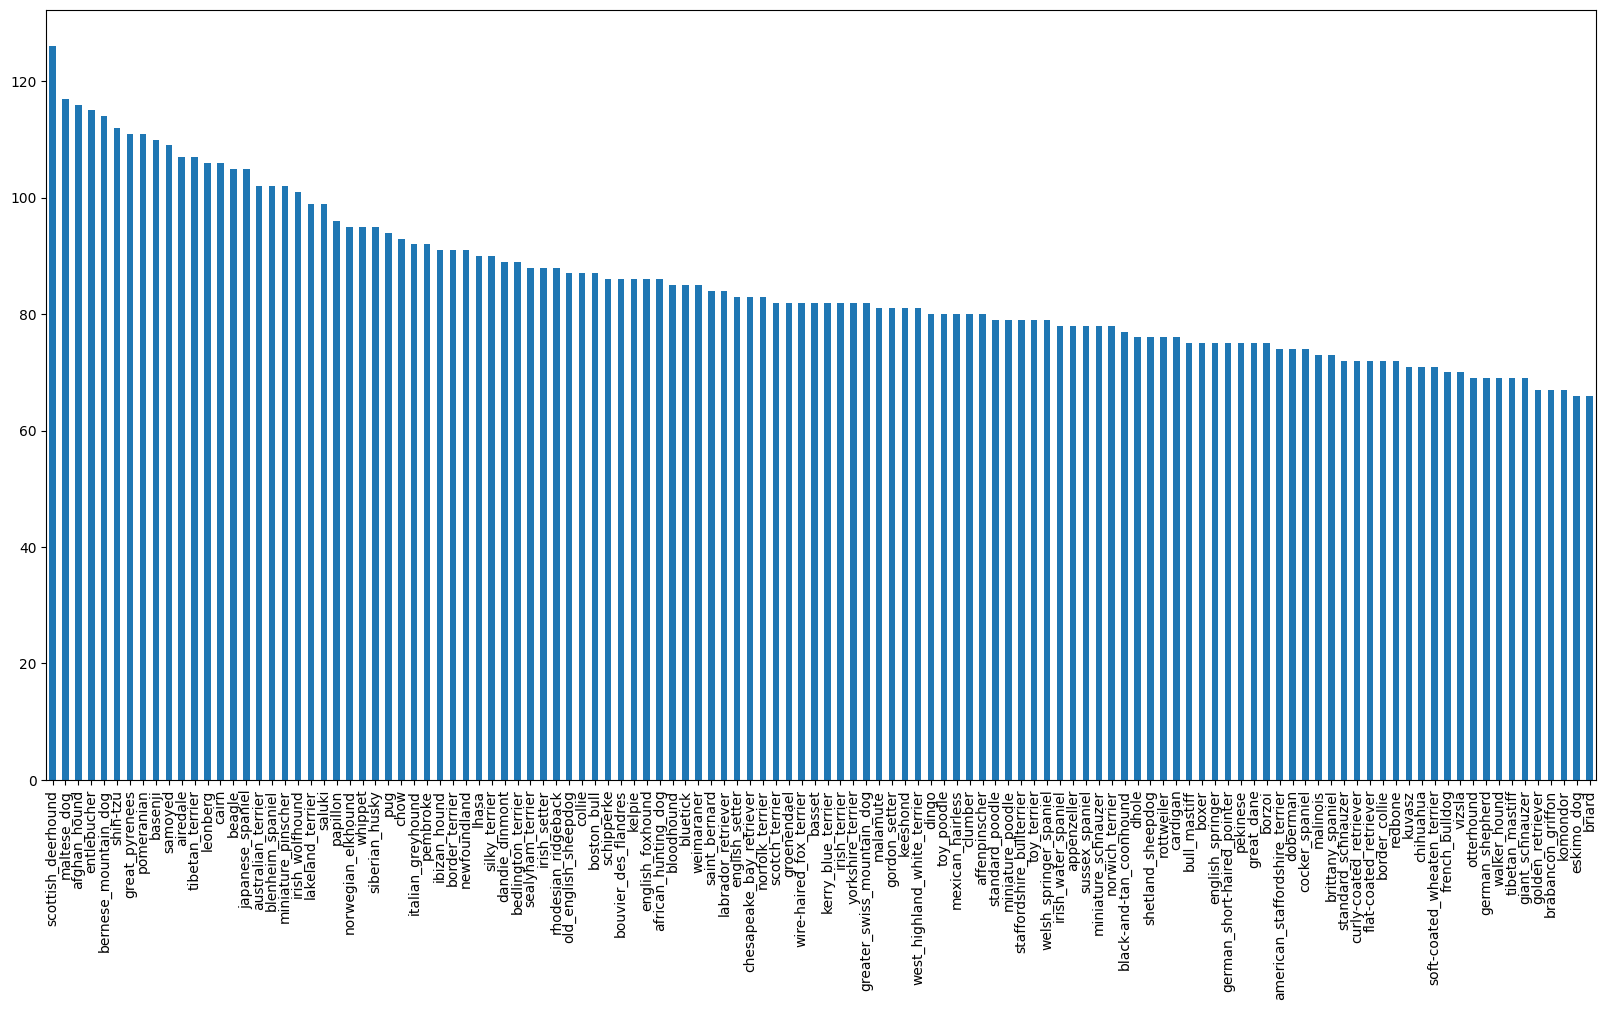

In [4]:
# How many images are there of each breed?
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10))

In [6]:
labels_csv["breed"].value_counts().median()

82.0

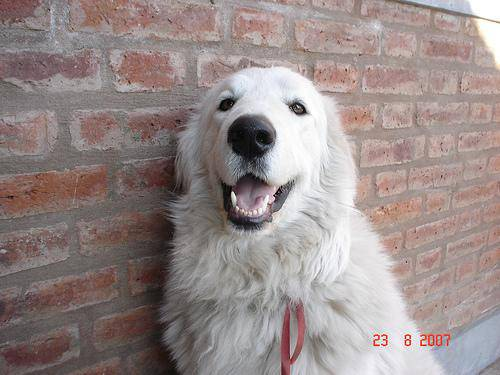

In [10]:
# Let 's view an image
from IPython.display import Image
Image(r"data\train\0a0c223352985ec154fd604d7ddceabd.jpg")

### Getting images and their labels
Let's get a list of all of our image file pathnames.

In [11]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [21]:
# Create pathnames from image ID's
filenames = ["data\\train\\" + fname + ".jpg" for fname in labels_csv["id"]]

# Check the first 10
filenames[:10]

['data\\train\\000bec180eb18c7604dcecc8fe0dba07.jpg',
 'data\\train\\001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'data\\train\\001cdf01b096e06d78e9e5112d419397.jpg',
 'data\\train\\00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'data\\train\\0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'data\\train\\002211c81b498ef88e1b40b9abf84e1d.jpg',
 'data\\train\\00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'data\\train\\002a283a315af96eaea0e28e7163b21b.jpg',
 'data\\train\\003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'data\\train\\0042188c895a2f14ef64a918ed9c7b64.jpg']

In [22]:
# Check whether number of filenames matches number of actual image files
import os
if len(os.listdir("data\\train\\")) == len(filenames):
    print("Filenames match actual amount of files!!! Proceed.")
else:
    print("Filenames do not match actual amount of files, check the directory.")


Filenames match actual amount of files!!! Proceed.


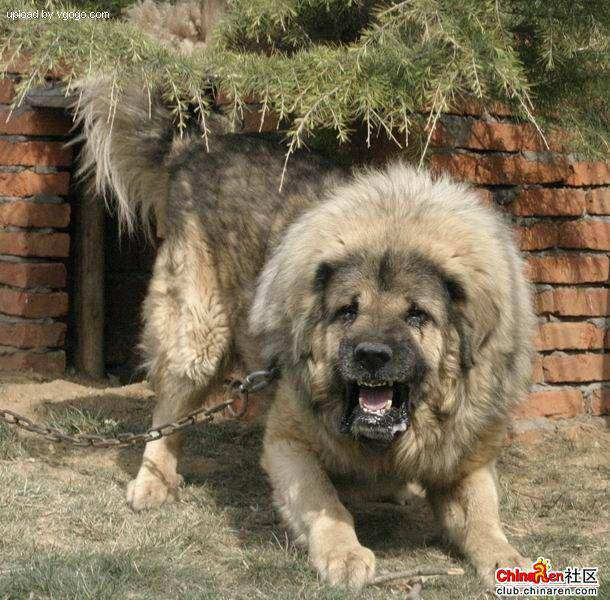

In [23]:
# One more check
Image(filenames[9000])

In [25]:
labels_csv["breed"][9000]

'tibetan_mastiff'